(1) Get the data \
(2) Discover and visualize the data to gain insight \
(3) Prepare the data for machine learning algorithm \
(4) Select and train a model \
(5) Fine-tune the model / Evaluation \

#Get the data

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

##Load the Dataset

In [ ]:
#import io
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
#Loading dataset using google drive

from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv('/content/gdrive/My Drive/data.csv')

Mounted at /content/gdrive


#Discover and visualize the data to gain insight

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [ ]:
df["default_ind"].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

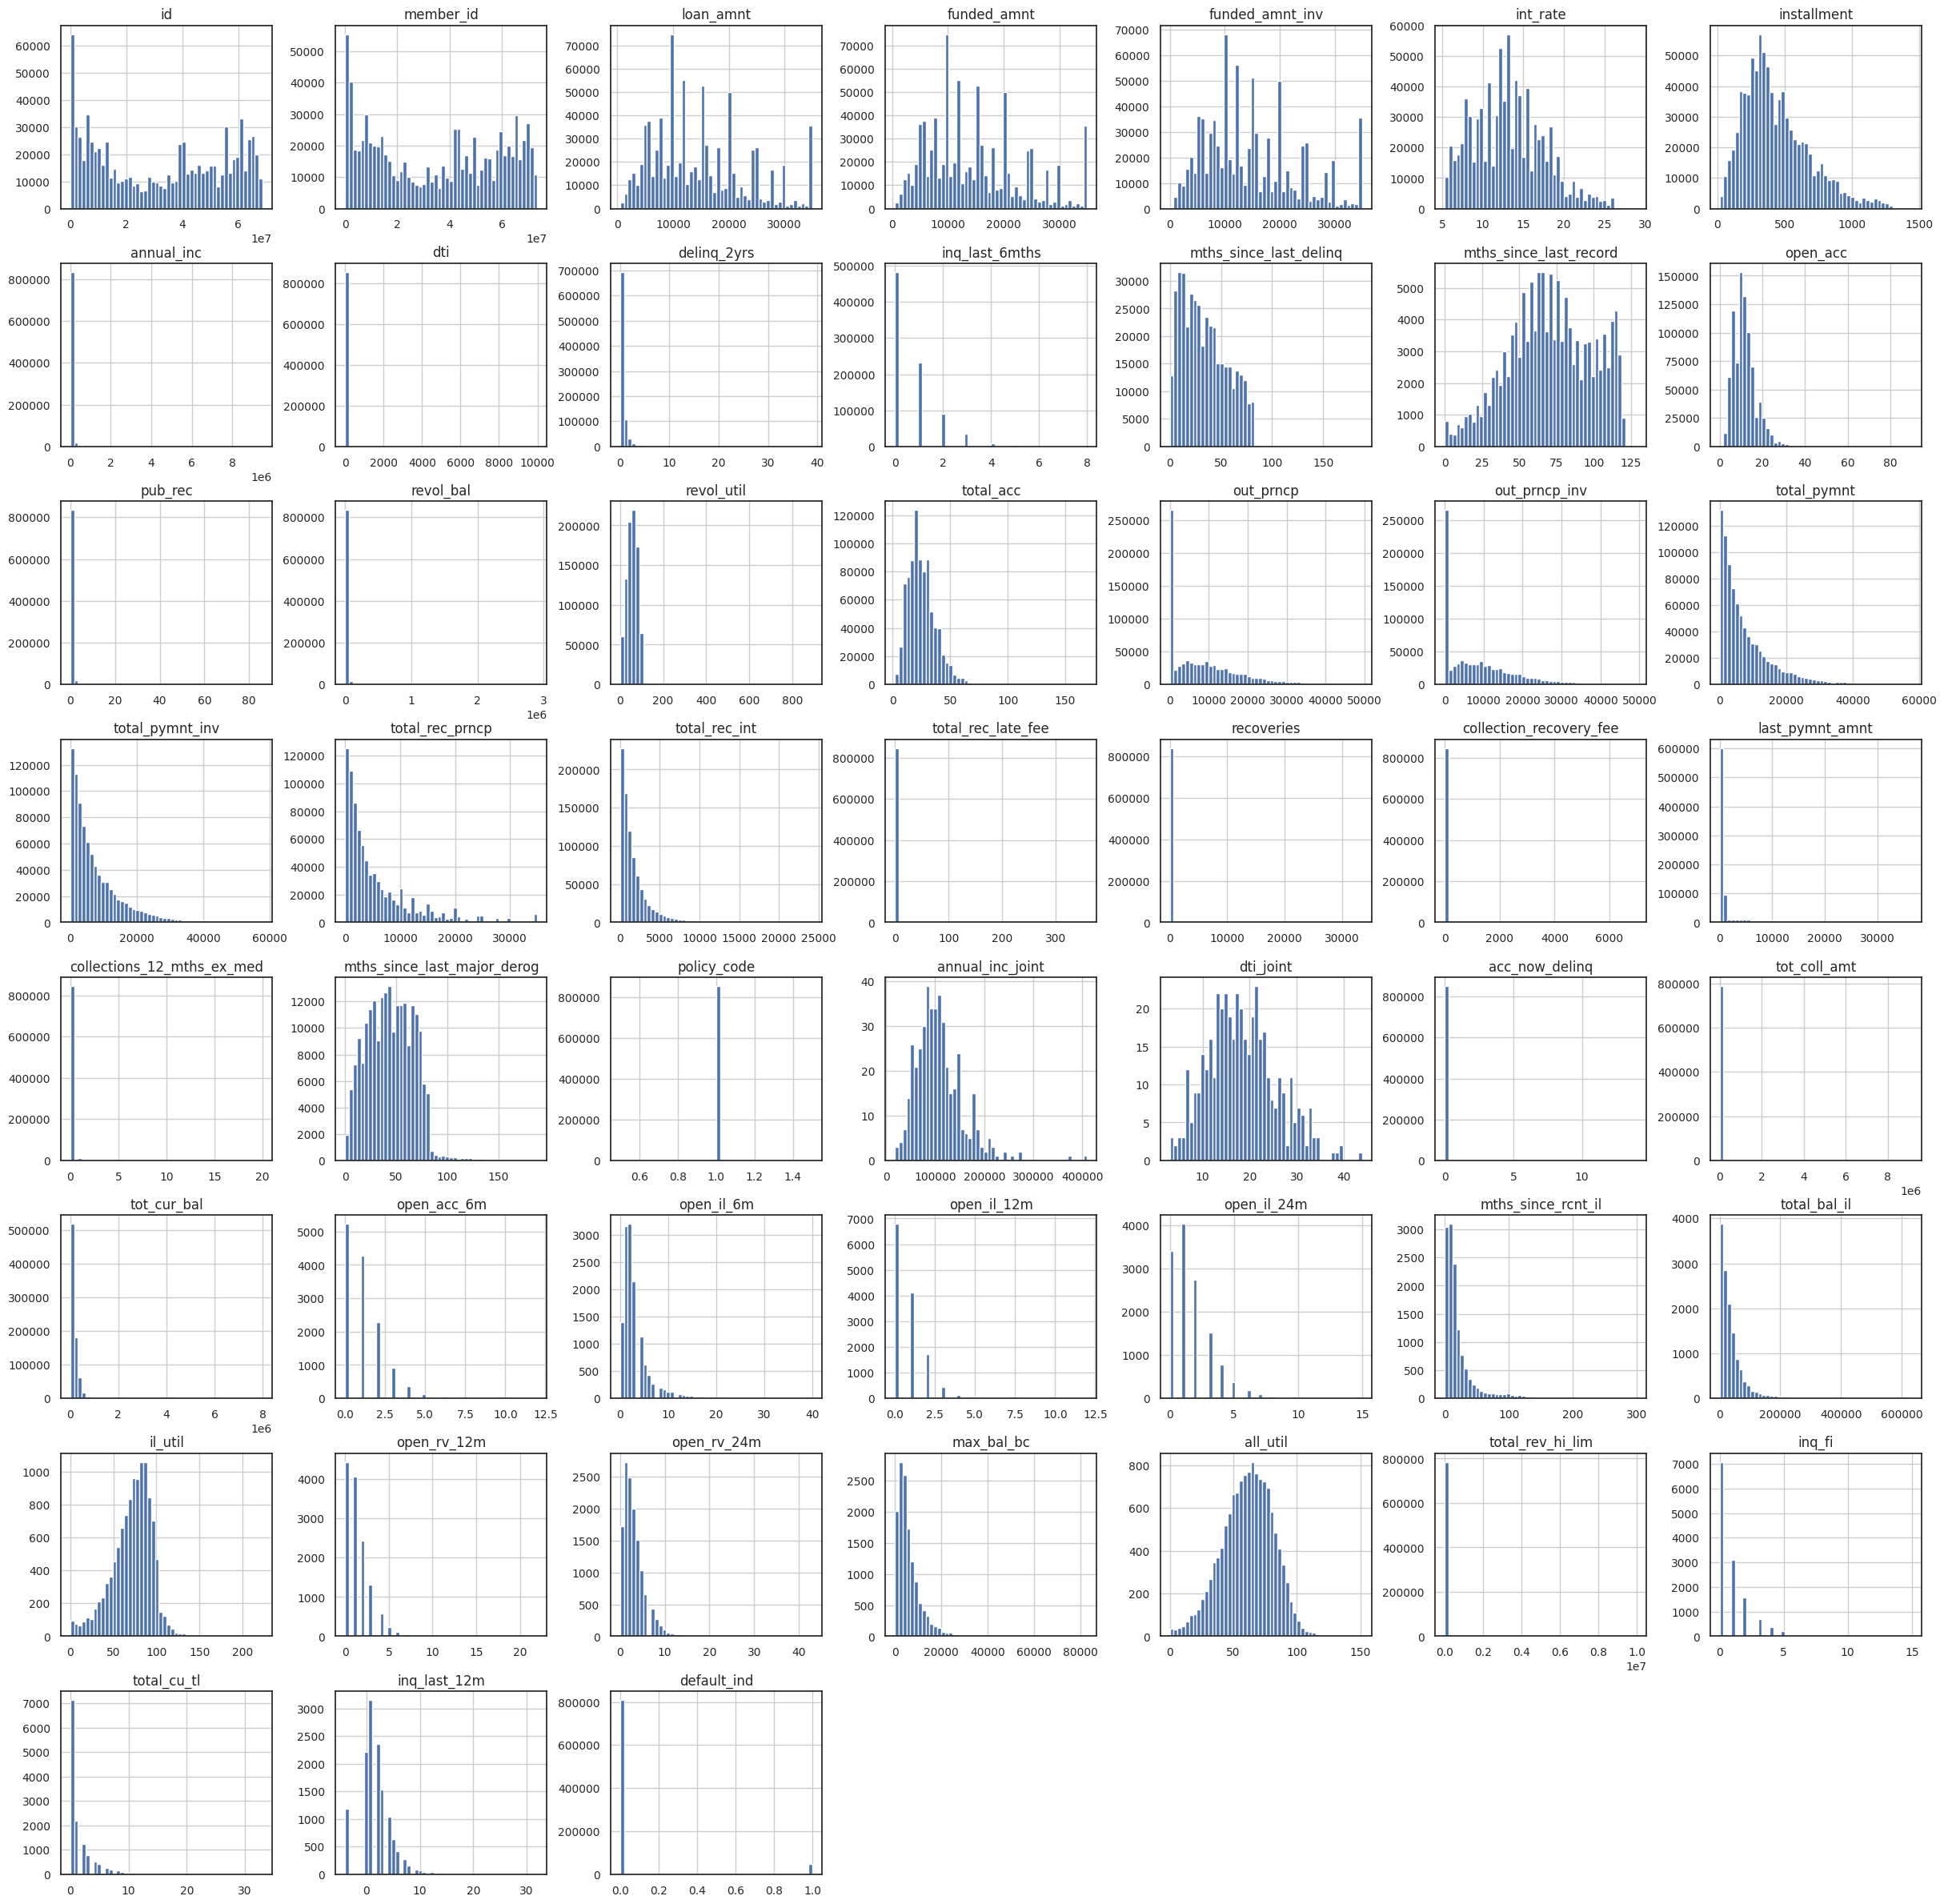

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(30,30))
plt.show()

#Prepare the data for machine learning algorithm

##Data Cleaning

In [ ]:
#Checking for missing values in the dataset

print(df.isnull().sum())

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64


In [ ]:
#Removing columns which have missing values

df = df.dropna(axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,2944.53,1027.35,0.00,0.00,0.00,332.10,1,INDIVIDUAL,0,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,7066.74,2465.65,0.00,0.00,0.00,797.03,1,INDIVIDUAL,0,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,1844.50,1925.24,0.00,0.00,0.00,316.07,1,INDIVIDUAL,0,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,1552.69,2234.98,0.00,0.00,0.00,317.86,1,INDIVIDUAL,0,0


In [ ]:
#Changing datetime format to year

df["issue_d"]=pd.to_datetime(df["issue_d"])
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])

df["issue_d"]= df["issue_d"].dt.year
df["earliest_cr_line"]= df["earliest_cr_line"].dt.year

In [ ]:
for column in df:
    print(df[column].value_counts())
    print()

1077501     1
60954075    1
60812149    1
60719227    1
60913560    1
           ..
29173989    1
29053518    1
29133990    1
29163866    1
36271262    1
Name: id, Length: 855969, dtype: int64

1296599     1
64995888    1
64843953    1
64760939    1
64955388    1
           ..
31717175    1
31576692    1
31677173    1
31707050    1
38982659    1
Name: member_id, Length: 855969, dtype: int64

10000    59793
12000    48618
15000    45654
20000    45352
35000    34854
         ...  
750          1
950          1
700          1
725          1
800          1
Name: loan_amnt, Length: 1368, dtype: int64

10000    59700
12000    48527
15000    45542
20000    45171
35000    34716
         ...  
800          1
750          1
950          1
700          1
725          1
Name: funded_amnt, Length: 1368, dtype: int64

10000.000000    54303
12000.000000    43528
15000.000000    40226
20000.000000    38843
35000.000000    28293
                ...  
7845.845017         1
14769.949950        1
8842.75

In [ ]:
#Removing policy_code column since policy_code has only one attribute

df = df.drop(["policy_code"], axis=1)

In [ ]:
#Removing id , member_id , zip_code , addr_state columns since these columns cannot determine the target variable

df = df.drop(["id","member_id","zip_code","addr_state"],axis=1)

## Handling Text and Categorical Attributes

In [ ]:
#Applying one-hot encoding to categorical features which have no ranking between values

df = pd.get_dummies(df, columns = ["home_ownership","verification_status","pymnt_plan","purpose","initial_list_status","application_type"])
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,issue_d,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,24000.0,2011,...,0,0,0,0,0,0,1,0,1,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,30000.0,2011,...,0,0,0,0,0,0,1,0,1,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,12252.0,2011,...,0,0,0,1,0,0,1,0,1,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,49200.0,2011,...,0,1,0,0,0,0,1,0,1,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,80000.0,2011,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,10000,10000.0,36 months,11.99,332.10,B,B5,31000.0,2015,...,0,0,0,0,0,0,1,0,1,0
855965,24000,24000,24000.0,36 months,11.99,797.03,B,B5,79000.0,2015,...,0,0,0,0,0,0,1,0,1,0
855966,13000,13000,13000.0,60 months,15.99,316.07,D,D2,35000.0,2015,...,0,0,0,0,0,0,0,1,1,0
855967,12000,12000,12000.0,60 months,19.99,317.86,E,E3,64400.0,2015,...,0,0,0,0,0,0,0,1,1,0


##Create Train and Test Data

In [ ]:
 #Split the data into training and testing sets with stratified sampling

X = df.drop("default_ind", axis=1)
y = df["default_ind"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify=y, random_state=42)

print("\nX_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())


X_train:
         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
655098      12950        12950          12700.0   60 months     20.99   
211708       8000         8000           8000.0   36 months     17.99   
318358      17000        17000          17000.0   36 months     17.57   
445859      10000        10000          10000.0   36 months     17.57   
517243      12225        12225          12225.0   60 months     16.55   

        installment grade sub_grade  annual_inc  issue_d  ...  purpose_moving  \
655098       350.27     E        E5     36000.0     2015  ...               0   
211708       289.18     D        D2    130000.0     2012  ...               0   
318358       610.93     D        D4     60000.0     2014  ...               0   
445859       359.38     D        D2     60000.0     2014  ...               0   
517243       300.88     D        D2     65000.0     2015  ...               0   

        purpose_other  purpose_renewable_energy  purpose_small_

In [ ]:
#X_train and X_test are for fine tuning ML models

X_train2 = X_train.copy()
X_test2 = X_test.copy()

##Custom Transformer

In [ ]:
#Custom Transformer to add a new feature Loan_to_Income and change continuous data into categorical data using binning technique

from sklearn.base import BaseEstimator, TransformerMixin
col_names = "loan_amnt", "annual_inc"
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_Loan_to_Income=True):
        self.add_Loan_to_Income = add_Loan_to_Income

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.add_Loan_to_Income:
            X['Loan_to_Income'] = X['loan_amnt'] / X['annual_inc']

        #Replacing infinite values with 0
        X = X.replace([np.inf, -np.inf], 0)

        #Changing continuous data into categorical data using binning technique
        for column in X:
            if (X[column].dtypes == "int64") or (X[column].dtypes == "float64"):

                minValue = X[column].min()
                maxValue = X[column].max()

                Bins = np.linspace(minValue,maxValue, 6)
                Labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']

                X[column] = pd.cut(X[column], bins=Bins, labels=Labels, include_lowest=True)

        return X

custom_transformer = CustomTransformer(add_Loan_to_Income=False)

##Transformation Pipeline

In [ ]:
"""Building a pipeline to apply
(1)custom_transformer,
(2)ordinal encoding to categorical data, and
(3)standardisation
to the data"""

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('custom_transformer', custom_transformer),
        ('ordinal_encoder', OrdinalEncoder()),
        ('std_scaler', StandardScaler())
])

X_train2 = full_pipeline.fit_transform(X_train2)
X_test2 = full_pipeline.fit_transform(X_test2)

#Select and train a model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

*Logistic Regression*


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, max_iter=1000)
lg.fit(X_train2, y_train)

y_pred = lg.predict(X_test2)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
print("\nAccuracy: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    161901
           1       0.84      0.43      0.57      9293

    accuracy                           0.96    171194
   macro avg       0.90      0.71      0.77    171194
weighted avg       0.96      0.96      0.96    171194

[[161126    775]
 [  5312   3981]]

Accuracy:  0.964443847331098


*Decision Tree*

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train2, y_train)

y_pred = dt.predict(X_test2)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
print("\nAccuracy: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    161901
           1       0.62      0.54      0.58      9293

    accuracy                           0.96    171194
   macro avg       0.80      0.76      0.78    171194
weighted avg       0.95      0.96      0.96    171194

[[158856   3045]
 [  4307   4986]]

Accuracy:  0.9570545696694978


*Random Forest*

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train2, y_train)

y_pred = rf.predict(X_test2)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
print("\nAccuracy: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    161901
           1       0.76      0.52      0.62      9293

    accuracy                           0.96    171194
   macro avg       0.86      0.76      0.80    171194
weighted avg       0.96      0.96      0.96    171194

[[160341   1560]
 [  4438   4855]]

Accuracy:  0.9649637253642067


# Fine-tune the model / Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logging for visual comparison of the models

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [ ]:
#Fine-tune Logistic Regression

full_pipeline = Pipeline([
        ('custom_transformer', custom_transformer),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('std_scaler', StandardScaler()),
        ('classifier', lg)
])

#Define the hyperparameters and their possible values for grid search
param_grid = {
    'custom_transformer__add_Loan_to_Income': [True, False],  # Values for the custom_transformer parameter
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'classifier__penalty': ['l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Get the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)
print()

#Get the best model from grid search
best_lg = grid_search.best_estimator_

#Predict on the test set with the best model
y_pred = best_lg.predict(X_test)

#Print the classification report and confusion matrix
print("Summary of the predictions:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Calculate and print the accuracy score
accuracy = accuracy_score(y_pred,y_test)
print("\nAccuracy: ",accuracy)

log_entry = pd.DataFrame([["Logistic regression", accuracy*100]], columns=log_cols)
log = log.append(log_entry)

Best Hyperparameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'custom_transformer__add_Loan_to_Income': True}

Summary of the predictions:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    161901
           1       0.82      0.44      0.58      9293

    accuracy                           0.96    171194
   macro avg       0.89      0.72      0.78    171194
weighted avg       0.96      0.96      0.96    171194

Confusion Matrix:
[[161002    899]
 [  5178   4115]]

Accuracy:  0.9645022605932451


In [ ]:
#Fine-tune Decision Tree

full_pipeline = Pipeline([
        ('custom_transformer', custom_transformer),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('std_scaler', StandardScaler()),
        ('classifier', dt)
])

#Define the hyperparameters and their possible values for grid search
param_grid = {
    'custom_transformer__add_Loan_to_Income': [True, False],  # Values for the custom_transformer parameter
    'classifier__max_depth': [3, 5, 10, 15],
    'classifier__criterion': ["gini", "entropy"]
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Get the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)
print()

#Get the best model from grid search
best_dt = grid_search.best_estimator_

#Predict on the test set with the best model
y_pred = best_dt.predict(X_test)

#Print the classification report and confusion matrix
print("Summary of the predictions:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Calculate and print the accuracy score
accuracy = accuracy_score(y_pred,y_test)
print("\nAccuracy: ",accuracy)

log_entry = pd.DataFrame([["Decision Tree", accuracy*100]], columns=log_cols)
log = log.append(log_entry)

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'custom_transformer__add_Loan_to_Income': True}

Summary of the predictions:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    161901
           1       0.86      0.52      0.65      9293

    accuracy                           0.97    171194
   macro avg       0.92      0.76      0.82    171194
weighted avg       0.97      0.97      0.97    171194

Confusion Matrix:
[[161149    752]
 [  4479   4814]]

Accuracy:  0.9694440225708845


In [ ]:
#Fine-tune Random Forest

full_pipeline = Pipeline([
        ('custom_transformer', custom_transformer),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('std_scaler', StandardScaler()),
        ('classifier', rf)
])

#Define the hyperparameters and their possible values for grid search
param_grid = {
    'custom_transformer__add_Loan_to_Income': [True, False],  # Values for the custom_transformer parameter
    'classifier__max_depth': [5, 10, 15],
    'classifier__n_estimators': [50,100,150]
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Get the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)
print()

#Get the best model from grid search
best_rf = grid_search.best_estimator_

#Predict on the test set with the best model
y_pred = best_rf.predict(X_test)

#Print the classification report and confusion matrix
print("Summary of the predictions:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Calculate and print the accuracy score
accuracy = accuracy_score(y_pred,y_test)
print("\nAccuracy: ",accuracy)

log_entry = pd.DataFrame([["Random Forest", accuracy*100]], columns=log_cols)
log = log.append(log_entry)

Best Hyperparameters: {'classifier__max_depth': 15, 'classifier__n_estimators': 150, 'custom_transformer__add_Loan_to_Income': True}

Summary of the predictions:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    161901
           1       0.91      0.45      0.60      9293

    accuracy                           0.97    171194
   macro avg       0.94      0.72      0.79    171194
weighted avg       0.97      0.97      0.96    171194

Confusion Matrix:
[[161481    420]
 [  5137   4156]]

Accuracy:  0.967539750224891


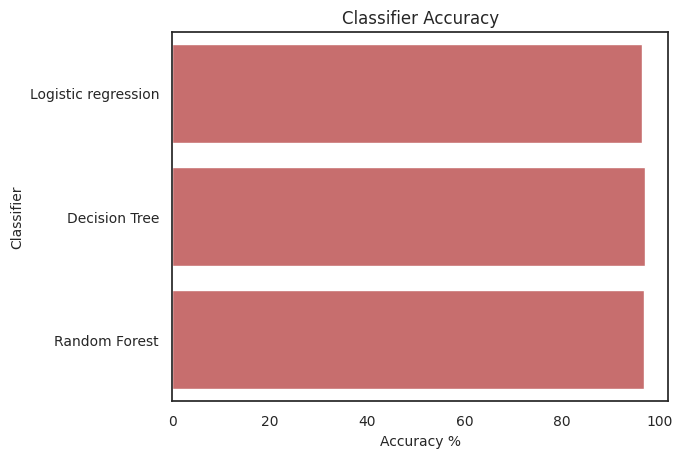

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Among three classifiers, Decision Tree performs the best, Random Forest second, and Logistic Regression third.

In [ ]:
#To convert notebook to html
!pip install nbconvert
!jupyter nbconvert --to html /content/Group15A1.ipynb

[NbConvertApp] Converting notebook /content/Group15A1.ipynb to html
[NbConvertApp] Writing 1271162 bytes to /content/Group15A1.html
